<a href="https://colab.research.google.com/github/Aashrit77/Assignments/blob/main/Airlines_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [16]:
air = pd.read_csv("/content/EastWestAirlines.csv")

In [17]:
air.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [18]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
air_df = scalar.fit_transform(air.iloc[:,1:])

In [19]:
air_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

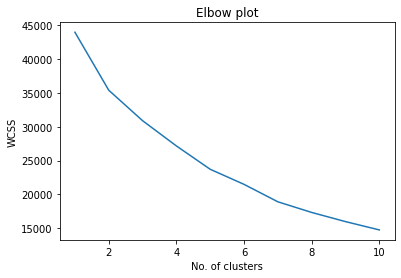

In [20]:
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters=i,random_state=0)
  kmeans.fit(air_df)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title("Elbow plot")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()

In [21]:
cluster_new = KMeans(5,random_state=42) 
cluster_new.fit(air_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [22]:
cluster_new.labels_

array([1, 1, 1, ..., 2, 1, 1], dtype=int32)

In [23]:
air["clusterid_name"] = cluster_new.labels_

In [24]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_name
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,0


In [26]:
air.groupby(["clusterid_name"]).agg(["mean"]).reset_index()

,clusterid_name,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2057.295082,119660.491803,5351.065574,2.000000,1.000000,1.000000,18683.475410,12.229508,963.639344,2.868852,3971.491803,0.557377
1,1,2237.521395,43543.198098,42.349049,1.225436,1.019414,1.000396,4723.081616,6.955626,199.804279,0.622821,3703.870444,0.200872
2,2,1598.158147,117485.166933,59.420128,3.707668,1.002396,1.001597,39341.133387,18.788339,346.053514,1.032748,4890.685304,0.650160
3,3,1757.802721,190251.952381,458.734694,2.224490,1.040816,1.000000,32907.979592,28.231293,5685.823129,16.523810,4673.081633,0.802721
4,4,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
